In [2]:
!pip install pandas
import pandas as pd

  Using cached pandas-2.0.3-cp38-cp38-macosx_11_0_arm64.whl.metadata (18 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.0.3-cp38-cp38-macosx_11_0_arm64.whl (10.7 MB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)


In [3]:
# 读取数据
advertising = pd.read_csv('../../data/advertising.csv')
print(advertising.head())
print(advertising.describe())
print(advertising.shape)

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000
(200, 5)


- axis=0 是DataFrame的“索引” (Index)。索引是用来标记行的。
- axis=1 是DataFrame的“列名” (Columns)。列名是用来标记列的。
- drop('SomeLabel', axis=0): pandas 会在索引（行标签）中查找 'SomeLabel' 并删除整行。
- drop('SomeLabel', axis=1): pandas 会在列名中查找 'SomeLabel' 并删除整整列。

In [10]:
# 数据预处理
# 去掉第一列ID
advertising.drop(advertising.columns[0], axis=1, inplace=True)
# 去掉空值
advertising.dropna(inplace=True)
# 提取特征和标签（目标值）
X = advertising.drop("Sales", axis=1)
y = advertising["Sales"]
X, y

(     Radio  Newspaper
 0     37.8       69.2
 1     39.3       45.1
 2     45.9       69.3
 3     41.3       58.5
 4     10.8       58.4
 ..     ...        ...
 195    3.7       13.8
 196    4.9        8.1
 197    9.3        6.4
 198   42.0       66.2
 199    8.6        8.7
 
 [200 rows x 2 columns],
 0      22.1
 1      10.4
 2       9.3
 3      18.5
 4      12.9
        ... 
 195     7.6
 196     9.7
 197    12.8
 198    25.5
 199    13.4
 Name: Sales, Length: 200, dtype: float64)

In [11]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


In [12]:
# 计算皮尔逊相关系数
print(X.corrwith(y, method="pearson"))

Radio        0.576223
Newspaper    0.228299
dtype: float64


In [13]:
corr_matrix = advertising.corr(method="pearson")
print(corr_matrix)

              Radio  Newspaper     Sales
Radio      1.000000   0.354104  0.576223
Newspaper  0.354104   1.000000  0.228299
Sales      0.576223   0.228299  1.000000


In [14]:
# 将相关系数矩阵画成热力图
!pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

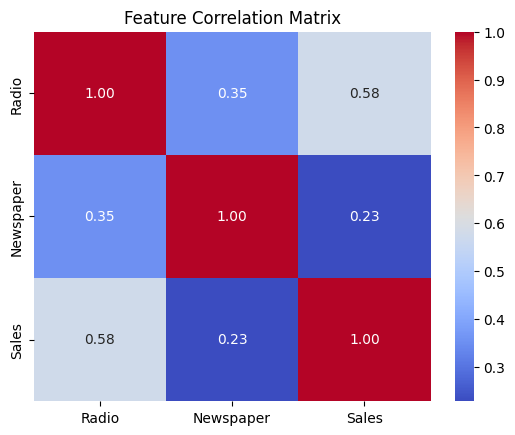

In [15]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()